In [1]:
import pickle

In [ ]:
# coord = [(40.7127837, -74.0059413),(34.0522342, -118.2436849),(41.8781136, -87.6297982),(29.7604267, -95.3698028),\
#          (39.9525839, -75.1652215),(33.4483771, -112.0740373),(29.4241219, -98.4936282),(32.715738, -117.1610838),\
#          (32.7766642, -96.7969879),(37.3382082, -121.8863286)]

In [2]:
## Loading coordinate data
with open('coord_user_1.pkl', 'rb') as handle:
    coord = pickle.load(handle)

## Using MATPLOTLIB

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import subplots

In [4]:
usa_img=mpimg.imread('template_map.jpg')

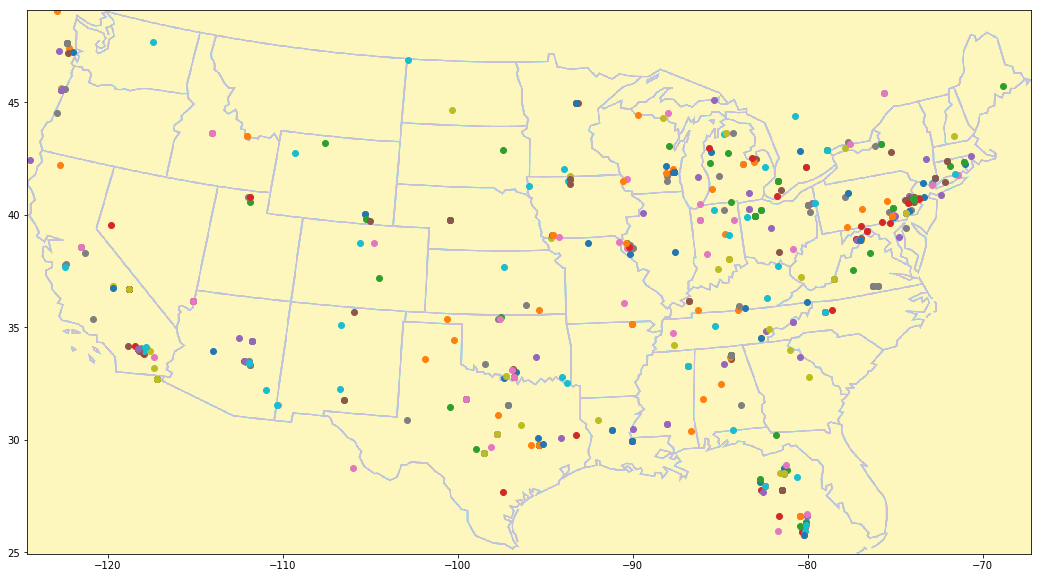

In [5]:
fig, ax = subplots(figsize=(18, 10))
for x,y in coord:
    ax.scatter(y,x)
ax.imshow(usa_img, extent=[-124.61, -67.23, 24.94, 49.08], alpha=0.3, aspect='auto')

## USING BOKEH

In [6]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import CARTODBPOSITRON
import math
import pandas as pd

In [7]:
def merc(Coordinates):
    lat = Coordinates[0]
    lon = Coordinates[1]
    
    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + 
        lat * (math.pi/180.0)/2.0)) * scale
    return (x, y)

In [8]:
coord = [c+merc(c) for c in coord]
df = pd.DataFrame.from_records(coord, columns=['lat','lon','coord_x','coord_y'])

In [9]:
df.head()

,lat,lon,coord_x,coord_y
0,28.148083,-82.743802,-9.210998e+06,3.267657e+06
1,39.159216,-84.738606,-9.433059e+06,4.744504e+06
2,29.949932,-90.070116,-1.002656e+07,3.497116e+06
3,34.053683,-118.242767,-1.316272e+07,4.036013e+06
4,34.851354,-82.398488,-9.172558e+06,4.143699e+06


In [10]:
p = figure(x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(CARTODBPOSITRON)
p.circle(x = df['coord_x'], 
         y = df['coord_y'],
         size=10,
         line_color="#FF0000", 
         fill_color="#FF0000",
         fill_alpha=0.05)
output_notebook()
show(p)

Loading BokehJS ...